In [1]:
%matplotlib inline

import itertools

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import mpl_toolkits

# for exclusion region
from shapely.geometry import Polygon
import geopandas as gpd
import matplotlib.patches as mpatches

In [2]:
from auction import BelloniAuctionApproximation as Approx

In [3]:
ex1 = Approx(
    n_buyers=1,
    n_grades=2,
    costs=[0.9,5],
    V=[[6,8],[9,11]],
    T=10,
    check_local_ic=True,
    log_level='WARNING')

In [8]:
ex1.run()

In [9]:
ex1.opt

5.124793388429744

In [10]:
ex2 = Approx(
    n_buyers=1,
    n_grades=2,
    costs=[0.9,5],
    V=[[6,8],[9,11]],
    T=20,
    check_local_ic=True,
    log_level='WARNING')

In [11]:
ex2.run()

In [12]:
ex2.opt

5.11904761904701

In [4]:
def allocation(approx, fname=None):
    
    # TODO handle randomizations! 

    ### data processing code

    # assert approx.n_buyers == 1, "This only works for N=1"
    # assert len(approx.V) == 2, "This only works for K=2"

    eps = 1e-6

    try:
        x, y = np.round(approx.V_T_list[0], 4), np.round(approx.V_T_list[1], 4)
        T = approx.T
    except AttributeError:
        x, y = np.round(approx.Xj_ranges[0], 4), np.round(approx.Xj_ranges[1], 4)
        if approx.T < 1:
            T = int(approx.X[0][1] * ebm.T) - int(approx.X[0][0] * ebm.T) 
        else:
            T = len(approx.Xj_ranges[0])-1
        
    Q1 = np.round(np.array([Qs[0] for Qs in approx.Q]), 4)
    Q2 = np.round(np.array([Qs[1] for Qs in approx.Q]), 4)

    # make alloc
    Q1alloc = (Q1 > eps).astype('int').reshape((T+1,T+1))
    Q2alloc = (Q2 > eps).astype('int').reshape((T+1,T+1))
    zeroalloc = (Q1alloc + Q2alloc == 0).astype('int')

    # fill Q1 alloc
    ixs = [np.any(row) for row in Q1alloc]
    Q1alloc_fillbetween_x = x[ixs]
    Q1alloc_fillbetween_y1 = []
    for i, val in enumerate(ixs):
        if val:
            Q1alloc_fillbetween_y1.append(
                min(y[Q1alloc[i] > 0]))
    Q1alloc_fillbetween_y1 = np.array(Q1alloc_fillbetween_y1)
    Q1alloc_fillbetween_y2 = []
    for i, val in enumerate(ixs):
        if val:
            Q1alloc_fillbetween_y2.append(
                max(y[Q1alloc[i] > 0]))
    Q1alloc_fillbetween_y2 = np.array(Q1alloc_fillbetween_y2)

    # fill Q2 alloc
    ixs = [np.any(row) for row in Q2alloc]
    Q2alloc_fillbetween_x = x[ixs]
    Q2alloc_fillbetween_y1 = []
    for i, val in enumerate(ixs):
        if val:
            Q2alloc_fillbetween_y1.append(
                min(y[Q2alloc[i] > 0]))
    Q2alloc_fillbetween_y1 = np.array(Q2alloc_fillbetween_y1)
    Q2alloc_fillbetween_y2 = []
    for i, val in enumerate(ixs):
        if val:
            Q2alloc_fillbetween_y2.append(
                max(y[Q2alloc[i] > 0]))
    Q2alloc_fillbetween_y2 = np.array(Q2alloc_fillbetween_y2)

    # fill exclusion region
    ixs = [np.any(row) for row in zeroalloc]
    zeroalloc_fillbetween_x = x[ixs]
    zeroalloc_fillbetween_y1 = []
    for i, val in enumerate(ixs):
        if val:
            zeroalloc_fillbetween_y1.append(
                min(y[zeroalloc[i] > 0]))
    zeroalloc_fillbetween_y1 = np.array(zeroalloc_fillbetween_y1)
    zeroalloc_fillbetween_y2 = []
    for i, val in enumerate(ixs):
        if val:
            zeroalloc_fillbetween_y2.append(
                max(y[zeroalloc[i] > 0]))
    zeroalloc_fillbetween_y2 = np.array(zeroalloc_fillbetween_y2)

    ### graphing code
    
    try:
        V = approx.V
    except AttributeError:
        V = approx.X

    fig, ax = plt.subplots(figsize=(8,8))
    
    ax.title.set_text(r"Allocation $X_1 \times X_2=%s\times%s$ (T=%s)" % \
                      (V[0], V[1], approx.T))
    ax.title.set_size('large')
    ax.set(xlabel=r"$X_1$", ylabel=r"$X_2$")

    xaxis_ticks = np.round(x, 2)
    yaxis_ticks = np.round(y, 2)

    ax.set_xlim(xaxis_ticks[0], xaxis_ticks[-1])
    ax.set_xticks(xaxis_ticks)
    ax.set_xticklabels(xaxis_ticks, rotation=-45)

    ax.set_ylim(yaxis_ticks[0], yaxis_ticks[-1])
    ax.set_yticks(yaxis_ticks)

    q1_patch = mpatches.Patch(color='blue', label=r'$(1,0)$ allocation')
    q2_patch = mpatches.Patch(color='red', label=r'$(0,1)$ allocation')
    random_patch = mpatches.Patch(color='purple', label='Randomized allocation')
    zero_patch = mpatches.Patch(color='black', label='Exclusion region')
    ax.legend(handles=[q1_patch,q2_patch,random_patch,zero_patch], prop={'size': 12})

    plt.rcParams.update({'font.size': 10})
    plt.rc('legend', fontsize=10)

    plt.fill_between(
        x=Q1alloc_fillbetween_x,
        y1=Q1alloc_fillbetween_y1,
        y2=Q1alloc_fillbetween_y2,
        color='blue',
        alpha=.8)

    plt.fill_between(
        x=Q2alloc_fillbetween_x,
        y1=Q2alloc_fillbetween_y1,
        y2=Q2alloc_fillbetween_y2,
        color='red',
        alpha=.7)

    plt.fill_between(
        x=zeroalloc_fillbetween_x,
        y1=zeroalloc_fillbetween_y1,
        y2=zeroalloc_fillbetween_y2,
        color='black',
        alpha=.8)

    if fname:
        plt.savefig(fname,bbox_inches="tight")
    plt.show()

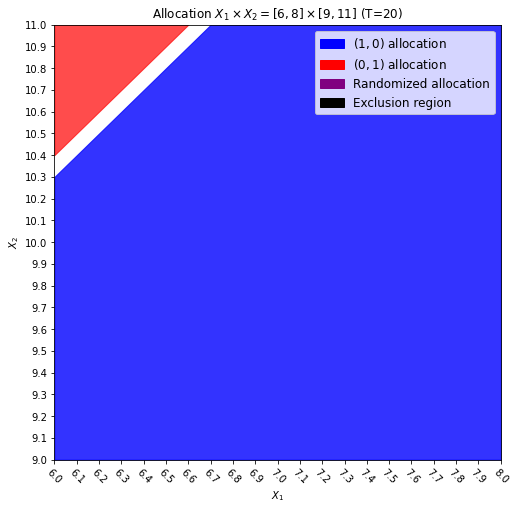

In [16]:
allocation(ex2)

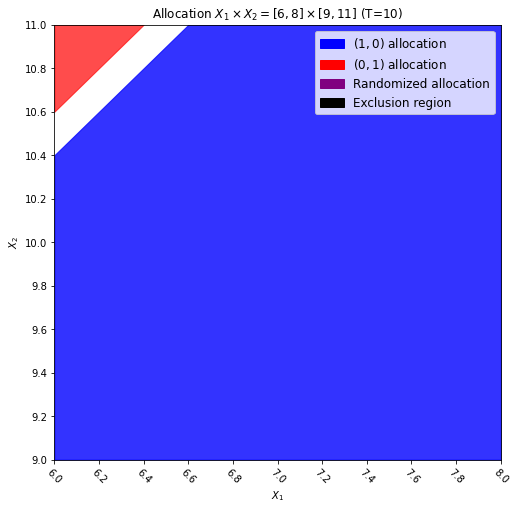

In [17]:
allocation(ex1)

In [18]:
oldN1 = Approx.from_file('/Users/jamesmichelson/github/auctions-qualitative/research/ACM-PETCO/setting2/setting2_N1.pkl')

In [19]:
oldN1.opt

5.119047619047608

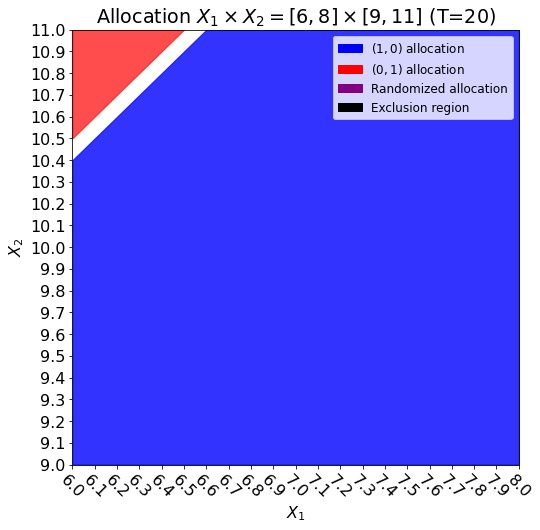

In [32]:
allocation(oldN1)

In [21]:
oldN1.V

[[6, 8], [9, 11]]

In [23]:
oldN1.costs

[0.9, 5]

In [5]:
def alloc3d(approx, Q1only=False):
    
    try:
        X = approx.V
        N = approx.n_buyers
        J = approx.n_grades
        X_ = approx.V_T_list[0]
        Y_ = approx.V_T_list[1]
        is_ebm = False
    except AttributeError:
        X = approx.X
        N = approx.N
        J = approx.J
        X_ = approx.Xj_ranges[0]
        Y_ = approx.Xj_ranges[1]
        is_ebm = True
    
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8,8))

    n_ticks = 11
    xticks = np.round(np.linspace(X[0][0], X[0][1], n_ticks),4)
    yticks = np.round(np.linspace(X[1][0], X[1][1], n_ticks),4)
    
    if is_ebm:
        Q1 = np.round([q[0] for q in approx.Q],4).reshape(((2*approx.T)+1,(2*approx.T)+1))
        Q2 = np.round([q[1] for q in approx.Q],4).reshape(((2*approx.T)+1,(2*approx.T)+1))
    else:
        Q1 = np.round([q[0] for q in approx.Q],4).reshape((approx.T+1,approx.T+1))
        Q2 = np.round([q[1] for q in approx.Q],4).reshape((approx.T+1,approx.T+1)) 
    # Q1Q2 = Q1+Q2


    X_, Y_ = np.meshgrid(X_, Y_)
    if Q1only:
        Z = Q1.T
    else:
        Z = (Q1+Q2).T

    # ax.plot_surface(X, Y, Z, color='grey') #cmap to make it easier to see ? 

    surf = ax.plot_surface(X_, Y_, Z, cmap='viridis')

    ax.title.set_text(r"$N=%s$, $J=%s$" % (N, J))
    ax.title.set_size('x-large')

    ax.invert_xaxis()
    ax.set_xlabel(r"$X_1$", size='x-large',  labelpad=10)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks, va='top') 

    ax.set_ylabel(r"$X_2$", size='x-large',  labelpad=10)
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticks, ha='left', va='bottom')

    ax.set_zlim(0, 1)
    ax.zaxis.set_rotate_label(False)
    ax.set_zlabel(r"$Q_1 + Q_2$", rotation=90, size='x-large', labelpad=10)
    ax.zaxis.set_major_formatter('{x:.01f}')

    # fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.rcParams.update({'font.size': 16})

    # plt.savefig("setting2_N2_prospectus.png",bbox_inches="tight")
    # plt.show()

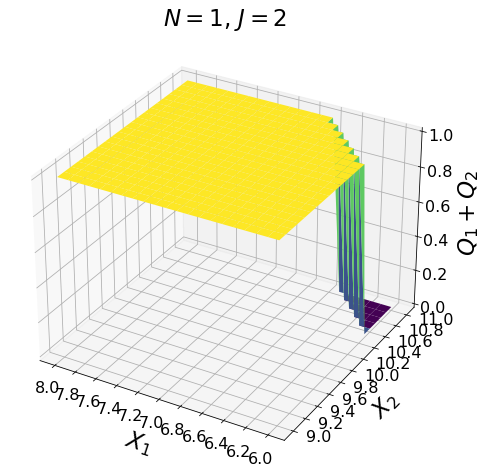

In [27]:
alloc3d(oldN1, True)

In [28]:
oldN2 = Approx.from_file('/Users/jamesmichelson/github/auctions-qualitative/research/ACM-PETCO/setting2/setting2_N2.pkl')

In [29]:
oldN2.opt

5.8931129574824705

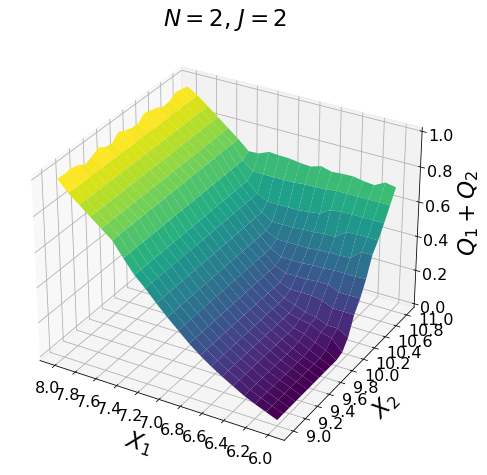

In [30]:
alloc3d(oldN2)

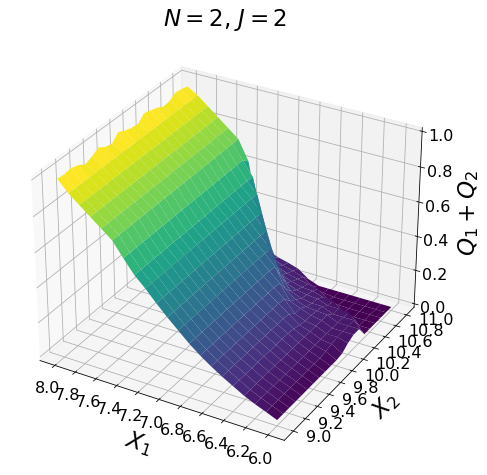

In [31]:
alloc3d(oldN2, True)

# OLD CODE

In [7]:
oldN1 = Approx.from_file('/Users/jamesmichelson/github/auctions-qualitative/research/ACM-PETCO/setting2/setting2_N1.pkl')
oldN2 = Approx.from_file('/Users/jamesmichelson/github/auctions-qualitative/research/ACM-PETCO/setting2/setting2_N2.pkl')

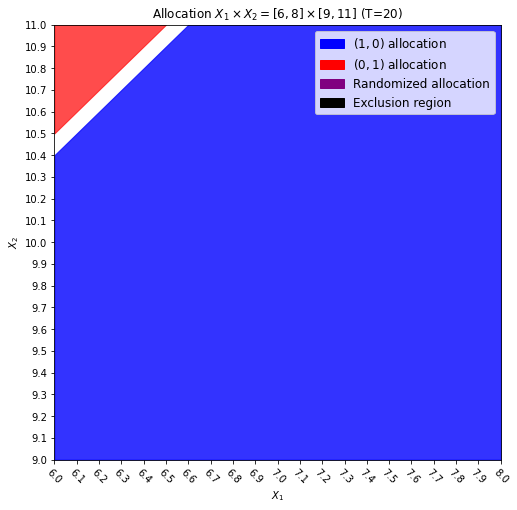

In [8]:
allocation(oldN1)

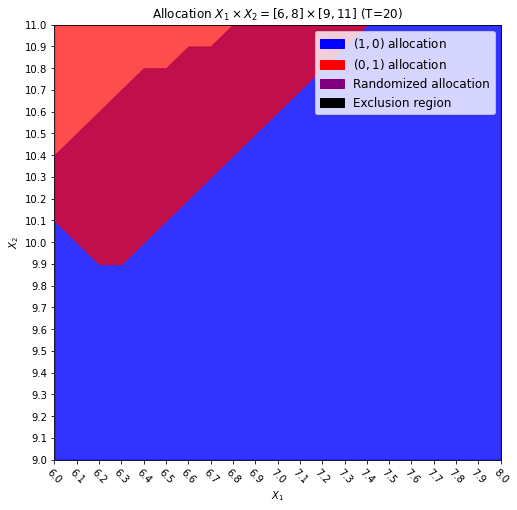

In [9]:
allocation(oldN2)

In [10]:
np.round([Q[0] for Q in oldN2.Q],4).reshape((oldN2.T+1,oldN2.T+1))[:8,:].T

array([[0.0126, 0.0385, 0.0629, 0.091 , 0.1259, 0.1605, 0.1989, 0.2413],
       [0.0126, 0.0385, 0.0629, 0.091 , 0.1259, 0.1605, 0.1989, 0.2413],
       [0.0126, 0.0385, 0.0629, 0.091 , 0.1259, 0.1605, 0.1989, 0.2413],
       [0.0126, 0.0385, 0.0629, 0.091 , 0.1259, 0.1605, 0.1989, 0.2413],
       [0.0126, 0.0385, 0.0629, 0.091 , 0.1259, 0.1605, 0.1989, 0.2413],
       [0.0126, 0.0385, 0.0629, 0.091 , 0.1259, 0.1605, 0.1989, 0.2413],
       [0.0126, 0.0385, 0.0629, 0.091 , 0.1259, 0.1605, 0.1989, 0.2413],
       [0.0126, 0.0385, 0.0629, 0.091 , 0.1259, 0.1605, 0.1989, 0.2413],
       [0.0126, 0.0385, 0.0629, 0.091 , 0.1259, 0.1605, 0.1989, 0.2413],
       [0.0126, 0.0385, 0.0629, 0.091 , 0.1259, 0.1605, 0.1989, 0.2413],
       [0.0126, 0.0448, 0.0629, 0.091 , 0.1197, 0.1605, 0.1989, 0.2413],
       [0.0188, 0.0548, 0.0633, 0.091 , 0.1092, 0.1542, 0.1989, 0.2413],
       [0.0463, 0.0633, 0.0633, 0.091 , 0.1018, 0.1257, 0.1927, 0.2413],
       [0.0633, 0.0633, 0.0633, 0.091 , 0.1018, 0.1

In [11]:
np.round([Q[1] for Q in oldN2.Q],4).reshape((oldN2.T+1,oldN2.T+1))[:8,:].T

array([[0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.0062, 0.0062, 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.0062, 0.0163, 0.0167, 0.0062, 0.    , 0.    , 0.    ],
       [0.0062, 0.0338, 0.0422, 0.0422, 0.0348, 0.0062, 0.    , 0.    ],
       [0.0338, 0.0507, 0.0507, 0.0507, 0.0507, 0.05  , 0.0062, 0.    ],
       [0.117 , 0.117 , 0.117 , 0.117 , 0.117 , 0.0

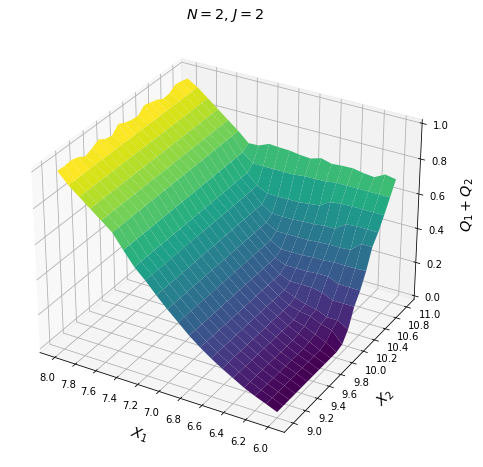

In [12]:
alloc3d(oldN2)

In [13]:
np.where(np.round([Q[1] for Q in oldN2.Q],4).reshape((oldN2.T+1,oldN2.T+1))[0,]>0)

(array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),)

In [14]:
np.round(oldN2.V_T_list[1][11],4)

10.1

In [59]:
np.where(np.round([Q[0] for Q in oldN2.Q],4).reshape((oldN2.T+1,oldN2.T+1))[0,]>0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),)

In [15]:
np.round(oldN2.V_T_list[1][15],4)

10.5

In [61]:
np.where(np.round([Q[1] for Q in oldN1.Q],4).reshape((oldN1.T+1,oldN1.T+1))[0,]>0)

(array([15, 16, 17, 18, 19, 20]),)

In [62]:
np.round(oldN2.V_T_list[1][15],4)

10.5

In [63]:
oldN2.opt

5.8931129574824705

In [64]:
oldN1.opt

5.119047619047608

In [75]:
((np.round([Q[1] for Q in oldN1.Q],4).reshape((oldN1.T+1,oldN1.T+1)) * 10.4).sum() + \
 (np.round([Q[0] for Q in oldN1.Q],4).reshape((oldN1.T+1,oldN1.T+1)) * 6).sum()) * (1/4) * (oldN1.eps ** 2)

6.846000000000002

In [120]:
Q1 = (np.round([Q[0] for Q in oldN1.Q],4).reshape((oldN1.T+1,oldN1.T+1)))
Q1[0,:] /= 2
Q1[-1,:] /= 2
Q1[:,0] /= 2
Q1[:,-1] /= 2

Q2 = (np.round([Q[1] for Q in oldN1.Q],4).reshape((oldN1.T+1,oldN1.T+1)))
Q2[0,:] /= 2
Q2[-1,:] /= 2
Q2[:,0] /= 2
Q2[:,-1] /= 2

((Q1 * (6-.9)).sum() + (Q2 * (10.5-5)).sum()) * (1/4) * (oldN1.eps ** 2)

5.115250000000001

In [100]:
(Q1 * (6-.9)).sum()  * (1/4) * (oldN1.eps ** 2)

4.905562500000001

In [102]:
 (Q2 * (10.5-5)).sum() * (1/4) * (oldN1.eps ** 2)

0.20968750000000005

In [121]:
Q1 = (np.round([Q[0] for Q in oldN2.Q],4).reshape((oldN2.T+1,oldN2.T+1)))
Q1[0,:] /= 2
Q1[-1,:] /= 2
Q1[:,0] /= 2
Q1[:,-1] /= 2

Q2 = (np.round([Q[1] for Q in oldN2.Q],4).reshape((oldN2.T+1,oldN2.T+1)))
Q2[0,:] /= 2
Q2[-1,:] /= 2
Q2[:,0] /= 2
Q2[:,-1] /= 2

((Q1 * (6-.9)).sum() + (Q2 * (10.1-5)).sum()) * (1/4) * (oldN2.eps ** 2) * 2

5.012057512500001

In [122]:
oldN2.opt

5.8931129574824705

In [123]:
Q1[:,15:]

array([[0.      , 0.      , 0.      , 0.      , 0.      , 0.      ],
       [0.0633  , 0.      , 0.      , 0.      , 0.      , 0.      ],
       [0.0633  , 0.0587  , 0.      , 0.      , 0.      , 0.      ],
       [0.0633  , 0.0633  , 0.0071  , 0.      , 0.      , 0.      ],
       [0.0907  , 0.0633  , 0.0587  , 0.0026  , 0.      , 0.      ],
       [0.0907  , 0.085   , 0.0633  , 0.0145  , 0.      , 0.      ],
       [0.1018  , 0.0907  , 0.0816  , 0.0633  , 0.0079  , 0.      ],
       [0.125   , 0.1018  , 0.0861  , 0.0748  , 0.0266  , 0.      ],
       [0.1962  , 0.125   , 0.1018  , 0.0861  , 0.0668  , 0.0116  ],
       [0.3384  , 0.2314  , 0.125   , 0.1018  , 0.0861  , 0.0334  ],
       [0.4002  , 0.3939  , 0.2642  , 0.125   , 0.1018  , 0.04305 ],
       [0.4603  , 0.4603  , 0.4541  , 0.3016  , 0.125   , 0.0509  ],
       [0.5246  , 0.5246  , 0.5246  , 0.5184  , 0.3319  , 0.0625  ],
       [0.5816  , 0.5816  , 0.5816  , 0.5816  , 0.5754  , 0.16595 ],
       [0.6576  , 0.6576  , 0.6576

In [115]:
Q2[:,15:]

array([[0.1627 , 0.21625, 0.2432 , 0.27745, 0.31405, 0.17545],
       [0.2576 , 0.4325 , 0.4864 , 0.5549 , 0.6281 , 0.3566 ],
       [0.2576 , 0.3222 , 0.4864 , 0.5549 , 0.6281 , 0.3407 ],
       [0.2576 , 0.3132 , 0.4747 , 0.5549 , 0.6281 , 0.3441 ],
       [0.2245 , 0.3132 , 0.3789 , 0.5497 , 0.6281 , 0.34975],
       [0.2245 , 0.288  , 0.3744 , 0.5313 , 0.6281 , 0.34865],
       [0.2077 , 0.2767 , 0.3493 , 0.4458 , 0.6122 , 0.34635],
       [0.1845 , 0.2655 , 0.3413 , 0.4264 , 0.5902 , 0.3543 ],
       [0.1133 , 0.2423 , 0.3211 , 0.4082 , 0.5499 , 0.33365],
       [0.0062 , 0.136  , 0.2979 , 0.3925 , 0.5227 , 0.3141 ],
       [0.     , 0.0062 , 0.1587 , 0.3693 , 0.507  , 0.309  ],
       [0.     , 0.     , 0.0062 , 0.1927 , 0.4838 , 0.30225],
       [0.     , 0.     , 0.     , 0.0062 , 0.2769 , 0.2929 ],
       [0.     , 0.     , 0.     , 0.     , 0.0334 , 0.177  ],
       [0.     , 0.     , 0.     , 0.     , 0.     , 0.02975],
       [0.     , 0.     , 0.     , 0.     , 0.     , 0.

In [139]:
X1 = np.array([V[0] for V in oldN2.V_T]).reshape((oldN2.T+1,oldN2.T+1))
X2 = np.array([V[1] for V in oldN2.V_T]).reshape((oldN2.T+1,oldN2.T+1))

Q1 = (np.round([Q[0] for Q in oldN2.Q],4).reshape((oldN2.T+1,oldN2.T+1)))
Q1[0,:] /= 2
Q1[-1,:] /= 2
Q1[:,0] /= 2
Q1[:,-1] /= 2

Q2 = (np.round([Q[1] for Q in oldN2.Q],4).reshape((oldN2.T+1,oldN2.T+1)))
Q2[0,:] /= 2
Q2[-1,:] /= 2
Q2[:,0] /= 2
Q2[:,-1] /= 2

((Q1 * (X1-.9)).sum() + (Q2 * (X2-5)).sum() - np.sum(oldN2.U)) * (1/4) * (oldN2.eps ** 2) * 2

5.703263565479372

In [140]:
oldN2.opt

5.8931129574824705

In [148]:
((Q1 * (6-.9)).sum() + (Q2 * (10.5-5)).sum()) * (1/4) * (oldN1.eps ** 2) * 2

5.067438512500002

In [149]:
oldN1.opt

5.119047619047608

In [150]:
Q1 = (np.round([Q[0] for Q in oldN2.Q],4).reshape((oldN2.T+1,oldN2.T+1)))

In [152]:
Q1[-1,:]

array([0.9898, 0.9875, 0.9921, 0.9807, 0.9558, 0.9717, 0.9943, 0.9694,
       0.9603, 0.9989, 0.9785, 0.9671, 0.9626, 0.9966, 0.9853, 0.9739,
       0.9535, 0.958 , 0.983 , 0.9762, 0.9649])

In [155]:
np.where(np.round([Q[0] for Q in oldN2.Q],4).reshape((oldN2.T+1,oldN2.T+1))[0,]>0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),)

In [159]:
oldN2.V_T_list[1][15]

10.499999999999995

In [160]:
np.where(np.round([Q[1] for Q in oldN2.Q],4).reshape((oldN2.T+1,oldN2.T+1))[0,]>0)

(array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),)

In [163]:
oldN2.V_T_list[1][11]

10.099999999999996

In [164]:
Q2 = (np.round([Q[1] for Q in oldN2.Q],4).reshape((oldN2.T+1,oldN2.T+1)))

In [165]:
Q2[-1,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [168]:
np.mean(Q1[-1,:])

0.9761952380952381

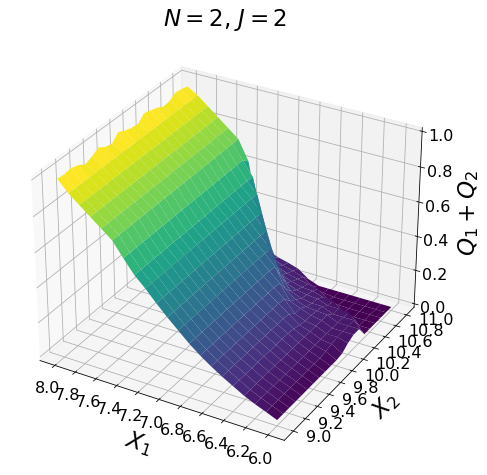

In [16]:
alloc3d(oldN2,True)